In [3]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
df_fish=pd.DataFrame(data=fish)
fish.head()


,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
X=df_fish.drop('Species',axis=1)
y=df_fish.Species
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
X

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,12.2,12.2,13.4,2.0904,1.3936
155,13.4,12.4,13.5,2.4300,1.2690
156,12.2,13.0,13.8,2.2770,1.2558
157,19.7,14.3,15.2,2.8728,2.0672


In [6]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.425
[[ 7  0  1  0  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 3  0 10  0  0  0  0]
 [ 1  0  6  0  0  0  0]
 [ 1  0  4  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 1  0  2  0  0  0  0]]


In [7]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7
[[ 8  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0 10  0  3  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  2  0  1  1  1]
 [ 0  0  0  0  0  1  0]
 [ 0  0  2  0  0  0  1]]


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.7
[[ 8  0  0  0  0  0  0]
 [ 0  0  1  0  2  0  0]
 [ 0  0 10  0  3  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  3  0  2  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  3  0  0  0  0]]


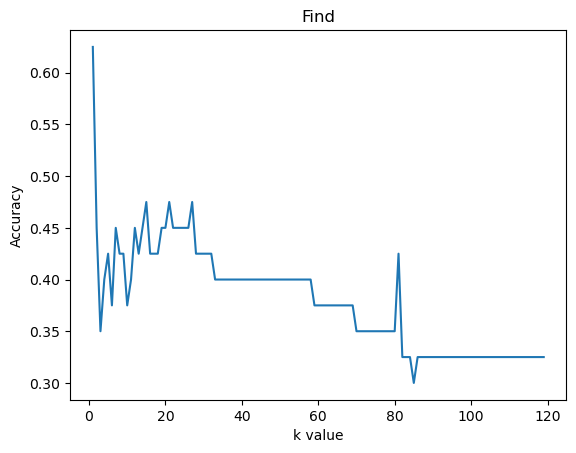

In [12]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1, 120)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find")
plt.show()